# EDA: Diagnosing Diabetes

In this project, you'll imagine you are a data scientist interested in exploring data that looks at how certain diagnostic factors affect the diabetes outcome of women patients.

You will use your EDA skills to help inspect, clean, and validate the data.

**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)

Let's get started!

## Initial Inspection

1. First, familiarize yourself with the dataset [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

   Look at each of the nine columns in the documentation.
   
   What do you expect each data type to be?

Expected data type for each column:

- `Pregnancies`: int64 
- `Glucose`: int64
- `BloodPressure`: int64
- `SkinThickness`: int64
- `Insulin`: int64
- `BMI`: float64
- `DiabetesPedigreeFunction`: float64
- `Age`: int64
- `Outcome`: int64

2. Next, let's load in the diabetes data to start exploring.

   Load the data in a variable called `diabetes_data` and print the first few rows.
   
   **Note**: The data is stored in a file called `diabetes.csv`.

In [1]:
import pandas as pd
import numpy as np

# load in data
diabetes_data = pd.read_csv('diabetes.csv')

# print the first 5 rows of data
diabetes_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


3. How many columns (features) does the data contain?

In [2]:
# print number of columns
print(diabetes_data.shape[1])


9


4. How many rows (observations) does the data contain?

In [3]:
# print number of rows
print(diabetes_data.shape[0])


768


## Further Inspection

5. Let's inspect `diabetes_data` further.

   Do any of the columns in the data contain null (missing) values?

In [5]:
# find whether columns contain null values
print(diabetes_data.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


6. If you answered no to the question above, not so fast!

   While it's technically true that none of the columns contain null values, that doesn't necessarily mean that the data isn't missing any values.
   
   When exploring data, you should always question your assumptions and try to dig deeper.
   
   To investigate further, calculate summary statistics on `diabetes_data` using the `.describe()` method.

In [6]:
# perform summary statistics using describe()
print(diabetes_data.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    31.992578                  0.471876   33.240885  
std      7.884160                  0.331329   11.760232  
min      0.000000                  0.078000   21.000000  
25%     27.300000        

7. Looking at the summary statistics, do you notice anything odd about the following columns?

   - `Glucose`
   - `BloodPressure`
   - `SkinThickness`
   - `Insulin`
   - `BMI`

**Your response to question 7**: There are values that are 0, which is not a valid value for these columns. For example you cant have a BMI of 0. These values are likely missing values.

8. Do you spot any other outliers in the data?

**Your response to question 8**: The standard deviation is very high for most of the columns. This indicates that the data is very spread out, indicating that there are outliers. For example, the standard deviation for `Pregnancies` is 3.8, with a max value of 17. This is a very large difference.

9. Let's see if we can get a more accurate view of the missing values in the data.

   Use the following code to replace the instances of `0` with `NaN` in the five columns mentioned:
   
   ```py
   diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)
   ```

In [7]:
# replace instances of 0 with NaN
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)


10. Next, check for missing (null) values in all of the columns just like you did in Step 5.

    Now how many missing values are there?

In [8]:
# find whether columns contain null values after replacements are made
print(diabetes_data.isnull().sum())


Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


11. Let's take a closer look at these rows to get a better idea of _why_ some data might be missing.

    Print out all the rows that contain missing (null) values.

In [10]:
# print rows with missing values
diabetes_data[diabetes_data.isnull().any(axis=1)].head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0


12. Go through the rows with missing data. Do you notice any patterns or overlaps between the missing data?

**Your response to question 12**: SkinThickness and Insulin are missing for the same rows. This is likely because the same test was not performed for these patients.

13. Next, take a closer look at the data types of each column in `diabetes_data`.

    Does the result match what you would expect?

In [11]:
# print data types using .info() method
print(diabetes_data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB
None


14. To figure out why the `Outcome` column is of type `object` (string) instead of type `int64`, print out the unique values in the `Outcome` column.

In [12]:
# print unique values of Outcome column
print(diabetes_data['Outcome'].unique())


['1' '0' 'O']


15. How might you resolve this issue?

**Your response to question 15**: The values in the `Outcome` column are strings beacuse som of the inputs were "O" and not 0. To fix this, we can convert the values to integers using the `.astype()` method.

In [14]:
# In column Outcome change "O" to 0 and then change the data type of the columtn to int64 using astype()
diabetes_data['Outcome'] = diabetes_data['Outcome'].replace('O', 0)
diabetes_data['Outcome'] = diabetes_data['Outcome'].astype('int64')
#print
print(diabetes_data['Outcome'].unique())
# print data types using .info() method
print(diabetes_data.info())

[1 0]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB
None


## Next Steps:

16. Congratulations! In this project, you saw how EDA can help with the initial data inspection and cleaning process. This is an important step as it helps to keep your datasets clean and reliable.

    Here are some ways you might extend this project if you'd like:
    - Use `.value_counts()` to more fully explore the values in each column.
    - Investigate other outliers in the data that may be easily overlooked.
    - Instead of changing the `0` values in the five columns to `NaN`, try replacing the values with the median or mean of each column.

In [24]:
# Use `.value_counts()` to more fully explore the values in each column using a loop that goes through each column name
for col in diabetes_data.columns:
    print(diabetes_data[col].value_counts())
    print('-------------------')


1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64
-------------------
99.0     17
100.0    17
111.0    14
129.0    14
125.0    14
         ..
191.0     1
177.0     1
44.0      1
62.0      1
190.0     1
Name: Glucose, Length: 135, dtype: int64
-------------------
70.0     57
74.0     52
78.0     45
68.0     45
72.0     44
64.0     43
80.0     40
76.0     39
60.0     37
62.0     34
66.0     30
82.0     30
88.0     25
84.0     23
90.0     22
58.0     21
86.0     21
50.0     13
56.0     12
52.0     11
54.0     11
75.0      8
92.0      8
65.0      7
94.0      6
85.0      6
48.0      5
96.0      4
44.0      4
98.0      3
100.0     3
106.0     3
110.0     3
55.0      2
30.0      2
104.0     2
46.0      2
108.0     2
61.0      1
38.0      1
24.0      1
122.0     1
102.0     1
95.0      1
40.0      1
114.0     1
Name: BloodPressure, dtype: int64

c:\Users\magnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\magnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\magnu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\magnu\anaconda3\lib\si

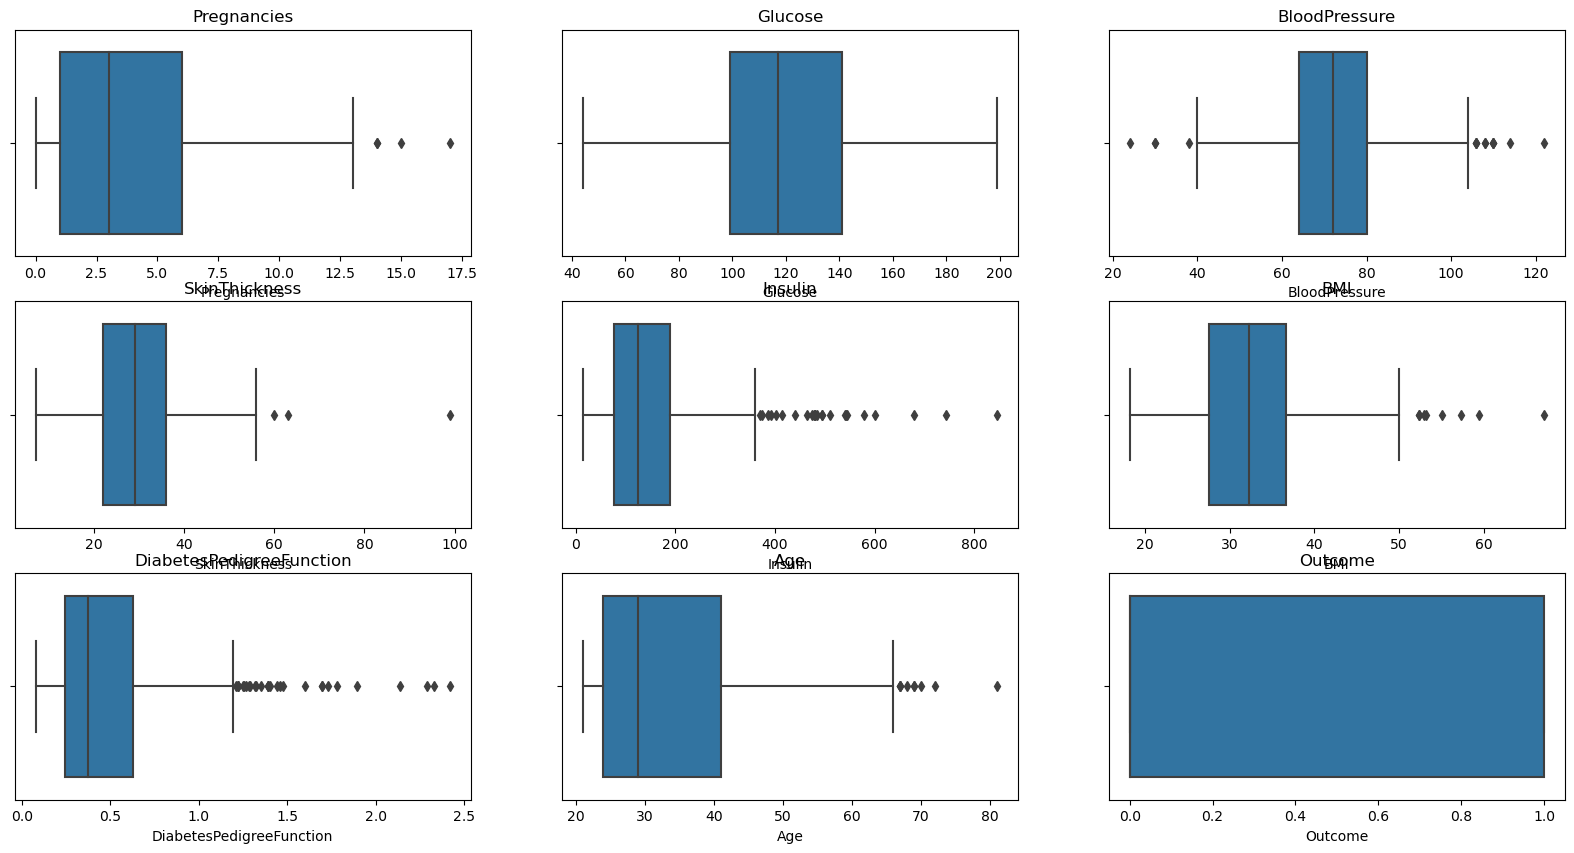

In [25]:
# Investigate other outliers in the data that may be easily overlooked.
# Use a boxplot to visualize the distribution of each column
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20, 10))
for i, col in enumerate(diabetes_data.columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(diabetes_data[col])
    plt.title(col)
plt.show()


In [32]:
# Instead of changing the `0` values in the five columns to `NaN`, try replacing the values with the median or mean of each column.
# Replace the `0` values in the five columns with the median of each column
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(np.NaN, diabetes_data.median())
diabetes_data.head(10)



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,29.0,125.0,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,72.0,29.0,125.0,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,29.0,125.0,32.3,0.232,54,1


In [35]:
#print meadian values
diabetes_data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64